In [1]:
import os

# move to project root
while True:
    # get list of directories
    dirs = os.listdir()
    if "README.md" in dirs:
        break
    else:
        os.chdir("..")
print(os.getcwd())

/home/ra/Codes/multilang_timescale


In [2]:
import json

from typing import List
import h5py


from itertools import product

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
from src.trainer import Trainer
from src.settings import TrainerConfig, SubjectConfig, FeatureConfig, ResultConfig

from src.plotting import plot_flatmap_from_mapper, plot_timeline_flatmaps

In [4]:
from himalaya import kernel_ridge

In [5]:
result_meta_dir = ".temp/result_meta"

In [6]:
# scanning result meta json files and put it into a dataframe
result_meta_files = os.listdir(result_meta_dir)
result_meta_files = [f for f in result_meta_files if f.endswith(".json")]
## read json and cast it into ResultConfig
result_meta_list = []
for f in result_meta_files:
    with open(os.path.join(result_meta_dir, f), "r") as f:
        result_config = ResultConfig(**json.load(f))
        result_meta_list.append(result_config.dict())

result_meta_df = pd.DataFrame(result_meta_list)

# add result_meta_files to result_meta_df
result_meta_df["result_meta_file"] = [
    os.path.join(result_meta_dir, f) for f in result_meta_files
]

In [7]:
result_meta_df.head()

,subject_config_path,feature_config_path,trainer_config_path,result_dir,hyperparam_path,stats_path,plot_dir,result_meta_file
0,.temp/config/subject/subject-07-reading.json,.temp/config/feature/BERT-all_timescales-7-fea...,.temp/config/train/trainer_config.json,.temp/result/faa8e328-affe-4746-bdad-0de0b12bc185,.temp/result/faa8e328-affe-4746-bdad-0de0b12bc...,.temp/result/faa8e328-affe-4746-bdad-0de0b12bc...,.temp/result/faa8e328-affe-4746-bdad-0de0b12bc...,.temp/result_meta/faa8e328-affe-4746-bdad-0de0...
1,.temp/config/subject/subject-07-reading.json,.temp/config/feature/mBERT-all_timescales-7-fe...,.temp/config/train/trainer_config.json,.temp/result/d22dc457-d5ee-44c7-be34-54055609a957,.temp/result/d22dc457-d5ee-44c7-be34-54055609a...,.temp/result/d22dc457-d5ee-44c7-be34-54055609a...,.temp/result/d22dc457-d5ee-44c7-be34-54055609a...,.temp/result_meta/d22dc457-d5ee-44c7-be34-5405...
2,.temp/config/subject/subject-07-reading.json,.temp/config/feature/BERT-all_timescales-7-fea...,.temp/config/train/trainer_config_shorttime.json,.temp/result/5813c885-182d-4f54-995f-8647544ab66e,.temp/result/5813c885-182d-4f54-995f-8647544ab...,.temp/result/5813c885-182d-4f54-995f-8647544ab...,.temp/result/5813c885-182d-4f54-995f-8647544ab...,.temp/result_meta/5813c885-182d-4f54-995f-8647...


In [8]:
result_meta_df["trainer_config_path"].unique()

array(['.temp/config/train/trainer_config.json',
       '.temp/config/train/trainer_config_shorttime.json'], dtype=object)

In [9]:
result_meta_df["subject_config_path"].unique()

array(['.temp/config/subject/subject-07-reading.json'], dtype=object)

In [10]:
result_meta_df["feature_config_path"].unique()

array(['.temp/config/feature/BERT-all_timescales-7-feature_config.json',
       '.temp/config/feature/mBERT-all_timescales-7-feature_config.json'],
      dtype=object)

In [11]:
# select some results
selected_train_config = [".temp/config/train/trainer_config.json"]
selected_feature_config = [
    ".temp/config/feature/BERT-all_timescales-7-feature_config.json",
    ".temp/config/feature/mBERT-all_timescales-7-feature_config.json",
]
selected_subject_config = [".temp/config/subject/subject-07-reading.json"]

# now select dataframe
selected_result_meta_df = result_meta_df.query(
    "trainer_config_path in @selected_train_config and \
                                                feature_config_path in @selected_feature_config and \
                                                subject_config_path in @selected_subject_config"
)

In [12]:
selected_result_meta_df

,subject_config_path,feature_config_path,trainer_config_path,result_dir,hyperparam_path,stats_path,plot_dir,result_meta_file
0,.temp/config/subject/subject-07-reading.json,.temp/config/feature/BERT-all_timescales-7-fea...,.temp/config/train/trainer_config.json,.temp/result/faa8e328-affe-4746-bdad-0de0b12bc185,.temp/result/faa8e328-affe-4746-bdad-0de0b12bc...,.temp/result/faa8e328-affe-4746-bdad-0de0b12bc...,.temp/result/faa8e328-affe-4746-bdad-0de0b12bc...,.temp/result_meta/faa8e328-affe-4746-bdad-0de0...
1,.temp/config/subject/subject-07-reading.json,.temp/config/feature/mBERT-all_timescales-7-fe...,.temp/config/train/trainer_config.json,.temp/result/d22dc457-d5ee-44c7-be34-54055609a957,.temp/result/d22dc457-d5ee-44c7-be34-54055609a...,.temp/result/d22dc457-d5ee-44c7-be34-54055609a...,.temp/result/d22dc457-d5ee-44c7-be34-54055609a...,.temp/result_meta/d22dc457-d5ee-44c7-be34-5405...


In [13]:
result_config_json_mbert = selected_result_meta_df.iloc[1].to_dict()

In [14]:
result_config_json_bert = selected_result_meta_df.iloc[0].to_dict()

In [15]:
trainer = Trainer(result_config_json=result_config_json_bert["result_meta_file"])

In [18]:
prediction = trainer.refit_and_evaluate(return_pred=True)

/home/ra/Codes/multilang_timescale/src/utils.py:144: RuntimeWarning: invalid value encountered in divide
  normalized_scores = np.nan_to_num(nz_scores / score_sum)


In [37]:
predictions = prediction[-1][0]

In [38]:
targets = trainer.test_data[:, trainer.mask]

In [39]:
from src.utils import permutation_test
from himalaya.scoring import correlation_score

In [41]:
permutation_test(targets, predictions, num_permutations=1000, score_func=correlation_score)

100%|██████████| 1000/1000 [08:29<00:00,  1.96it/s]


(array([0.002, 0.945, 0.578, ..., 0.273, 0.501, 0.669]),
 array([ 0.20386004, -0.13645527, -0.00907037, ...,  0.05236597,
        -0.01181069, -0.01498117]))

In [ ]:
test_selectivity = scores["test_r_selectivity"]

In [26]:
from src.plotting import plot_flatmap_from_mapper

<Axes: >

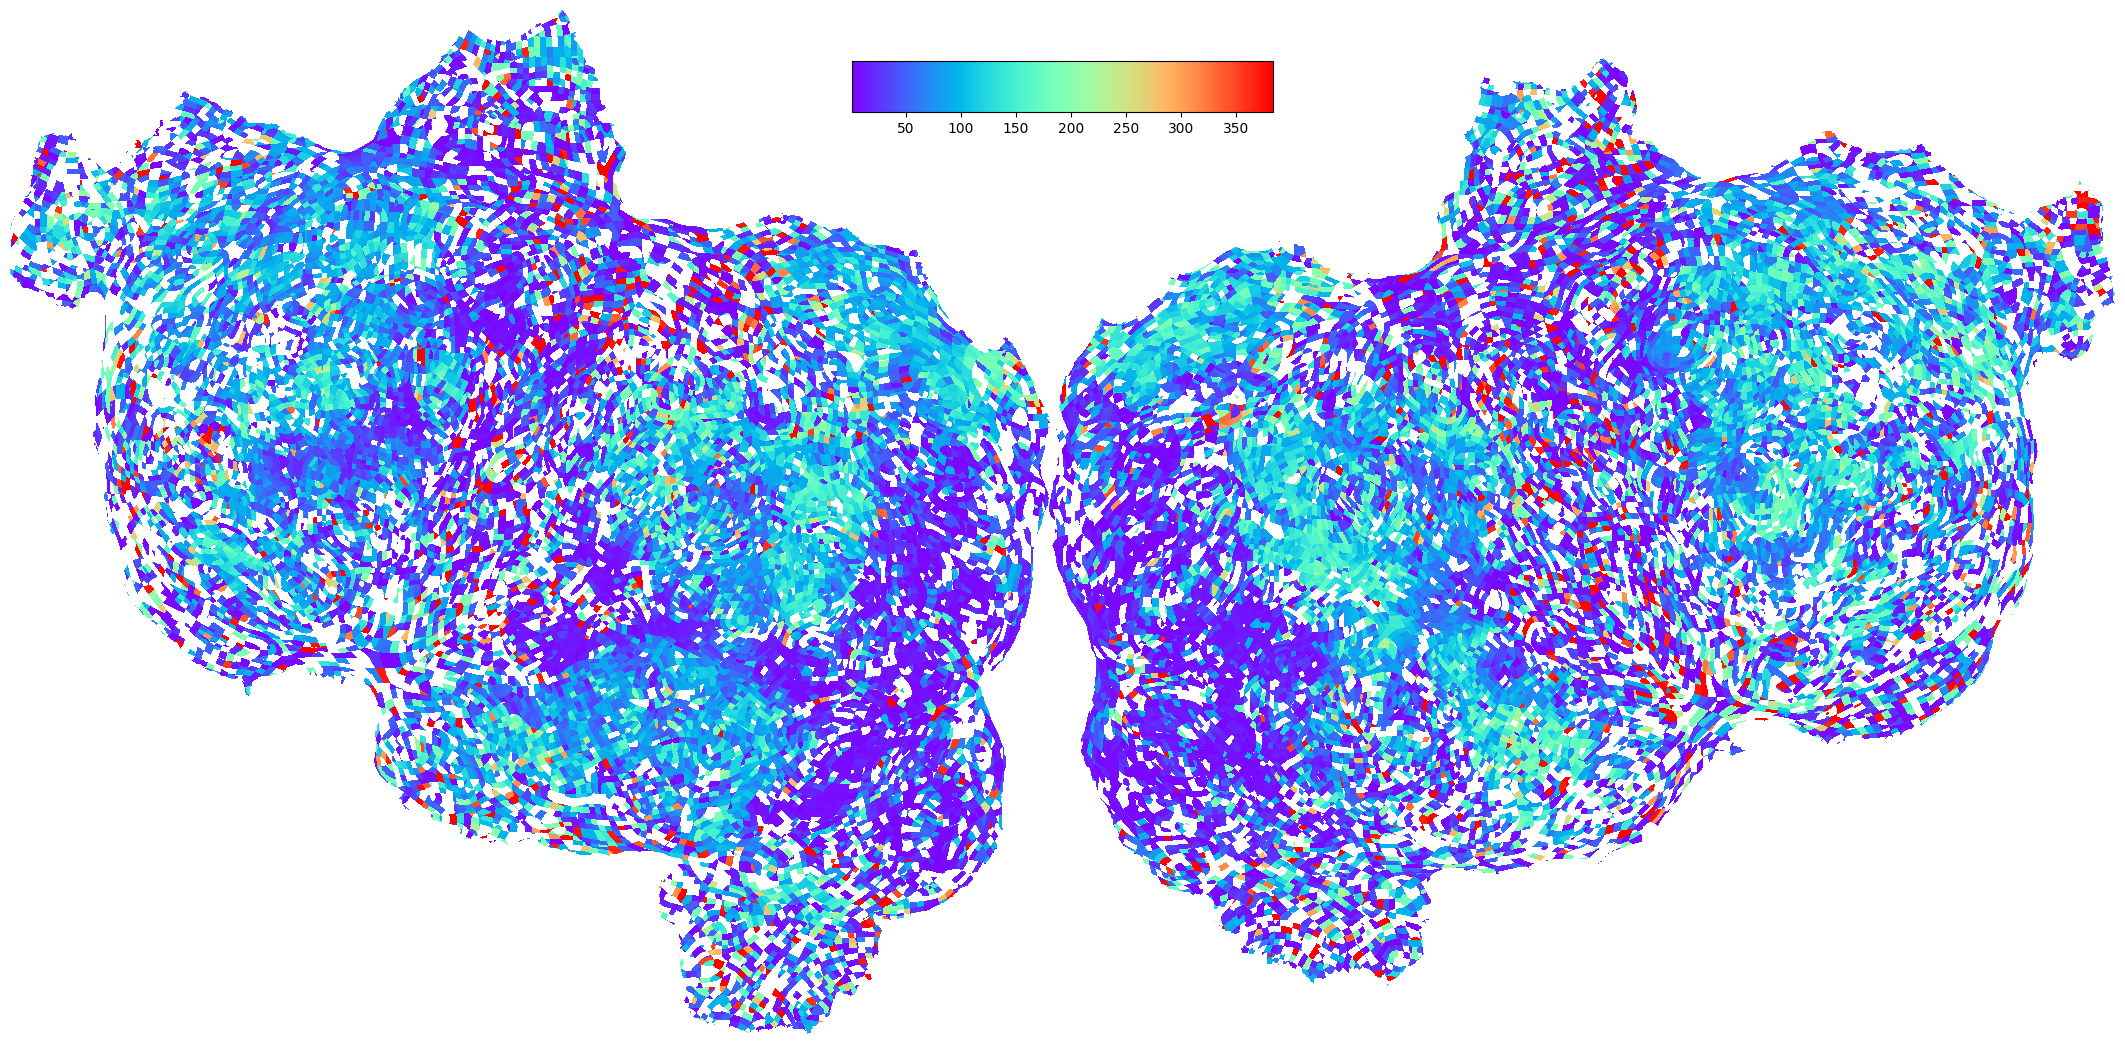

In [28]:
plot_flatmap_from_mapper(
    test_selectivity,
    trainer.sub_config.sub_fmri_mapper_path,
    alpha=trainer.mask.astype(float),
    cmap="rainbow",
)

512

In [24]:
np.power(2, test_selectivity).shape

(92970,)

In [91]:
nz_scores = np.maximum(timescale_scores, 0)

In [92]:
score_sum = np.sum(nz_scores, axis=0)

normalized_scores = nz_scores / score_sum
normalized_scores = np.nan_to_num(normalized_scores)

/tmp/ipykernel_542848/369012061.py:3: RuntimeWarning: invalid value encountered in divide
  normalized_scores = nz_scores / score_sum


In [93]:
from src.config import timescales, timescale_ranges

In [94]:
mid_ranges = np.array([np.mean(timescale_ranges[key]) for key in timescales])
mid_ranges = np.log2(mid_ranges)

In [95]:
# row-wise multiplication
weighted_scores = np.stack(
    [normalized_scores[i,] * mid_ranges[i] for i in range(normalized_scores.shape[0])]
)

In [97]:
timescale_selectivity = weighted_scores.sum(axis=0)

In [100]:
timescale_selectivity.max()

8.584962500721156

In [104]:
timescale_selectivity.mean()

3.9271870303431635

In [41]:
b = np.random.normal(size=(2, 2))

In [43]:
nz_scores

array([[0.42792788, 0.        ],
       [0.77011676, 1.20344995]])

# ARG MAX Timescale

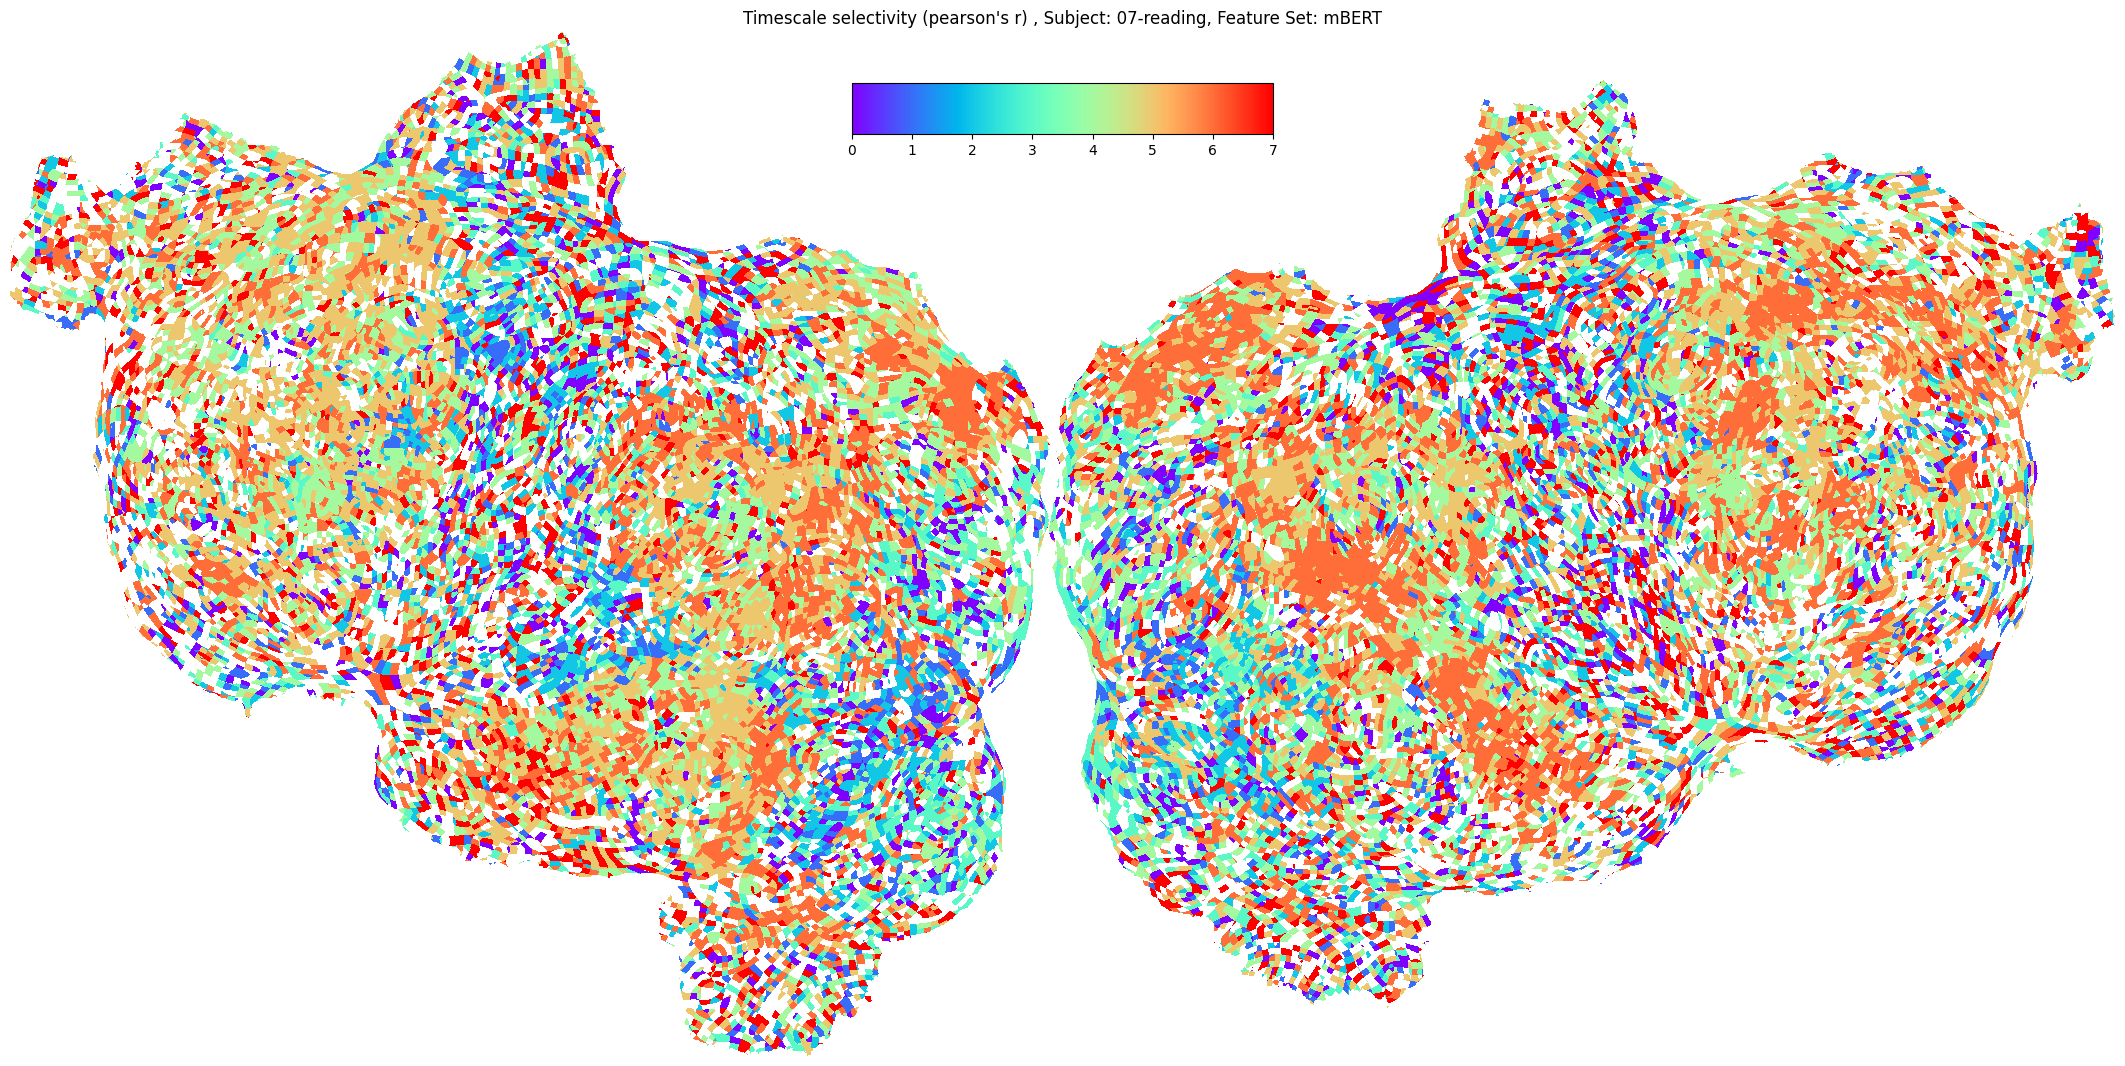

In [29]:
plot_timeline_flatmaps(
    result_config_json_mbert["result_meta_file"], feature_name="mBERT"
)

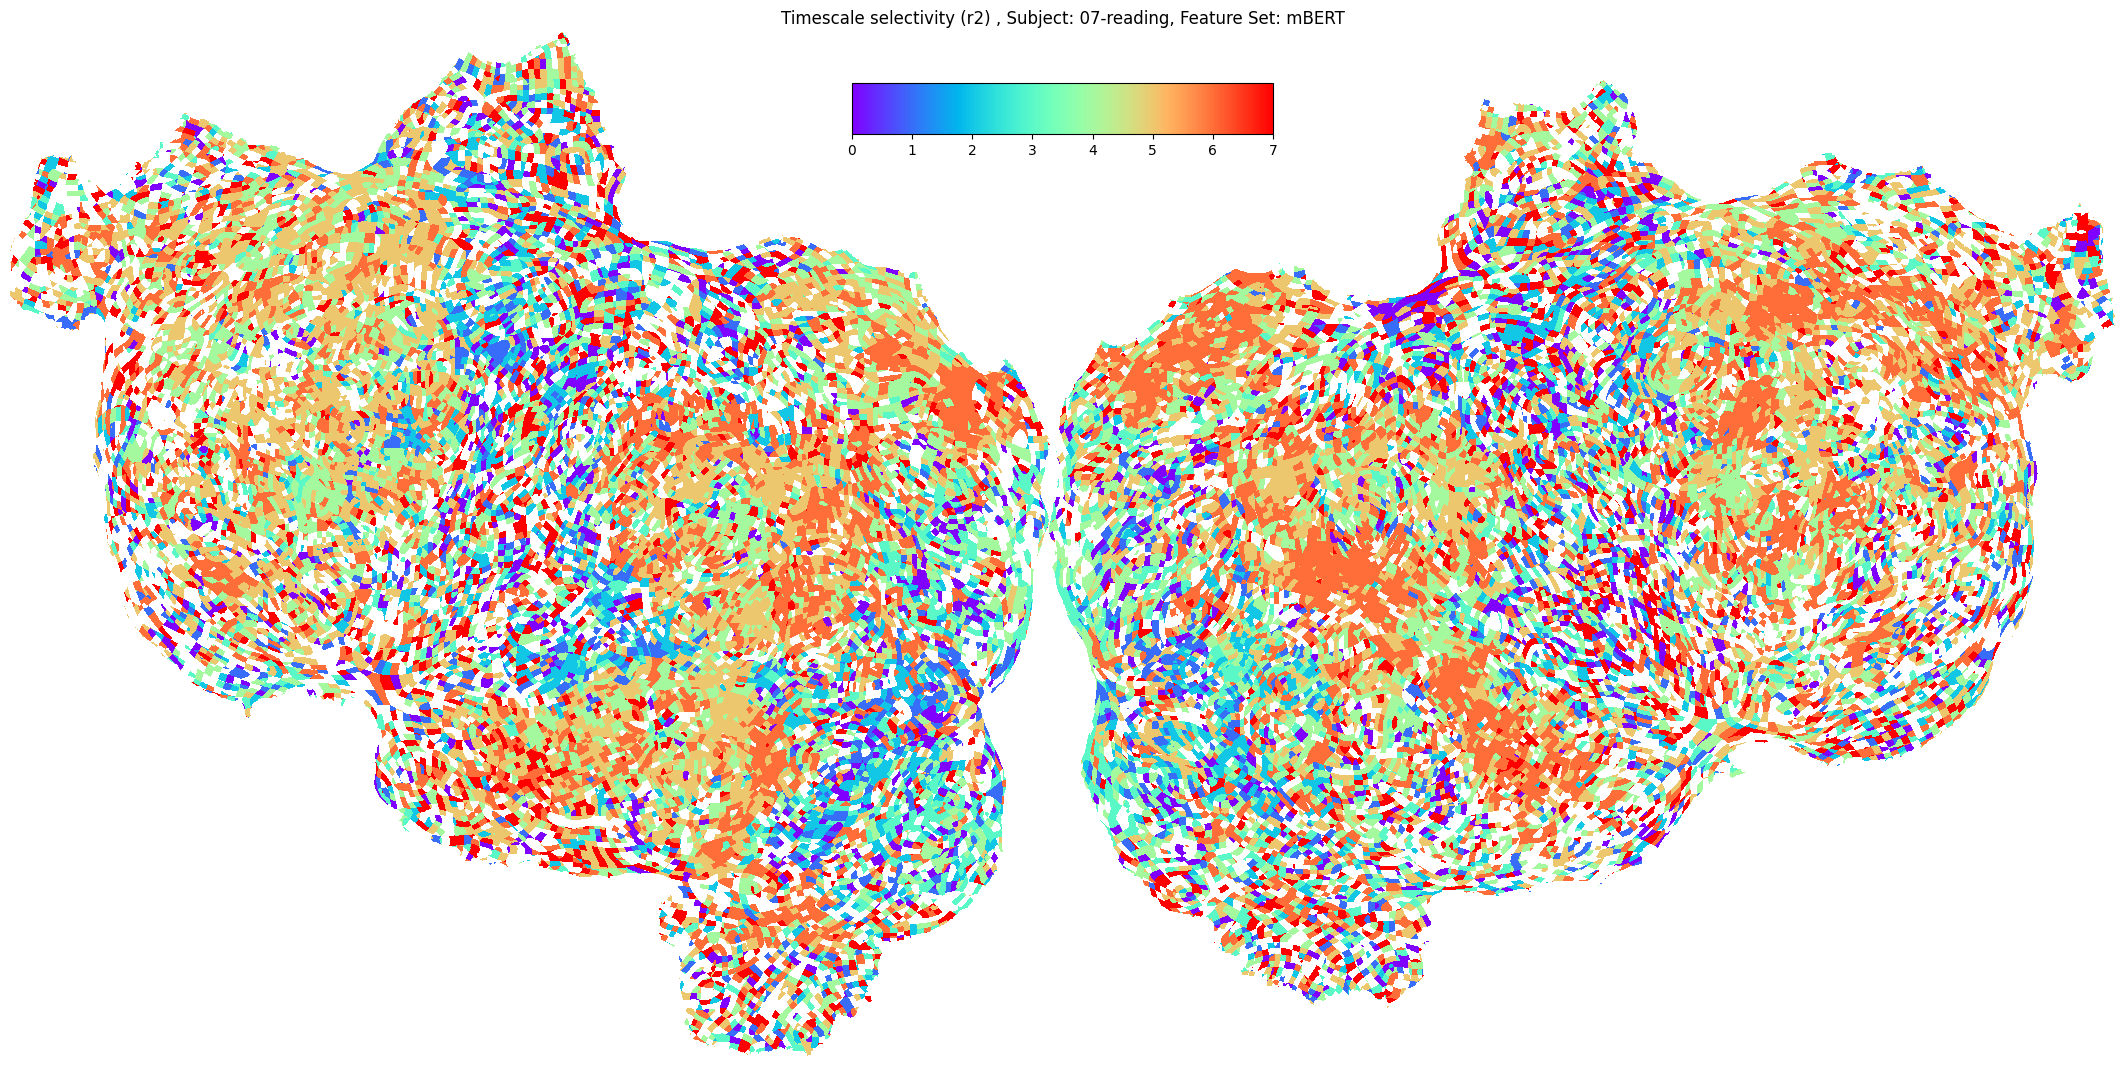

In [30]:
plot_timeline_flatmaps(
    result_config_json_mbert["result_meta_file"], feature_name="mBERT", is_corr=False
)

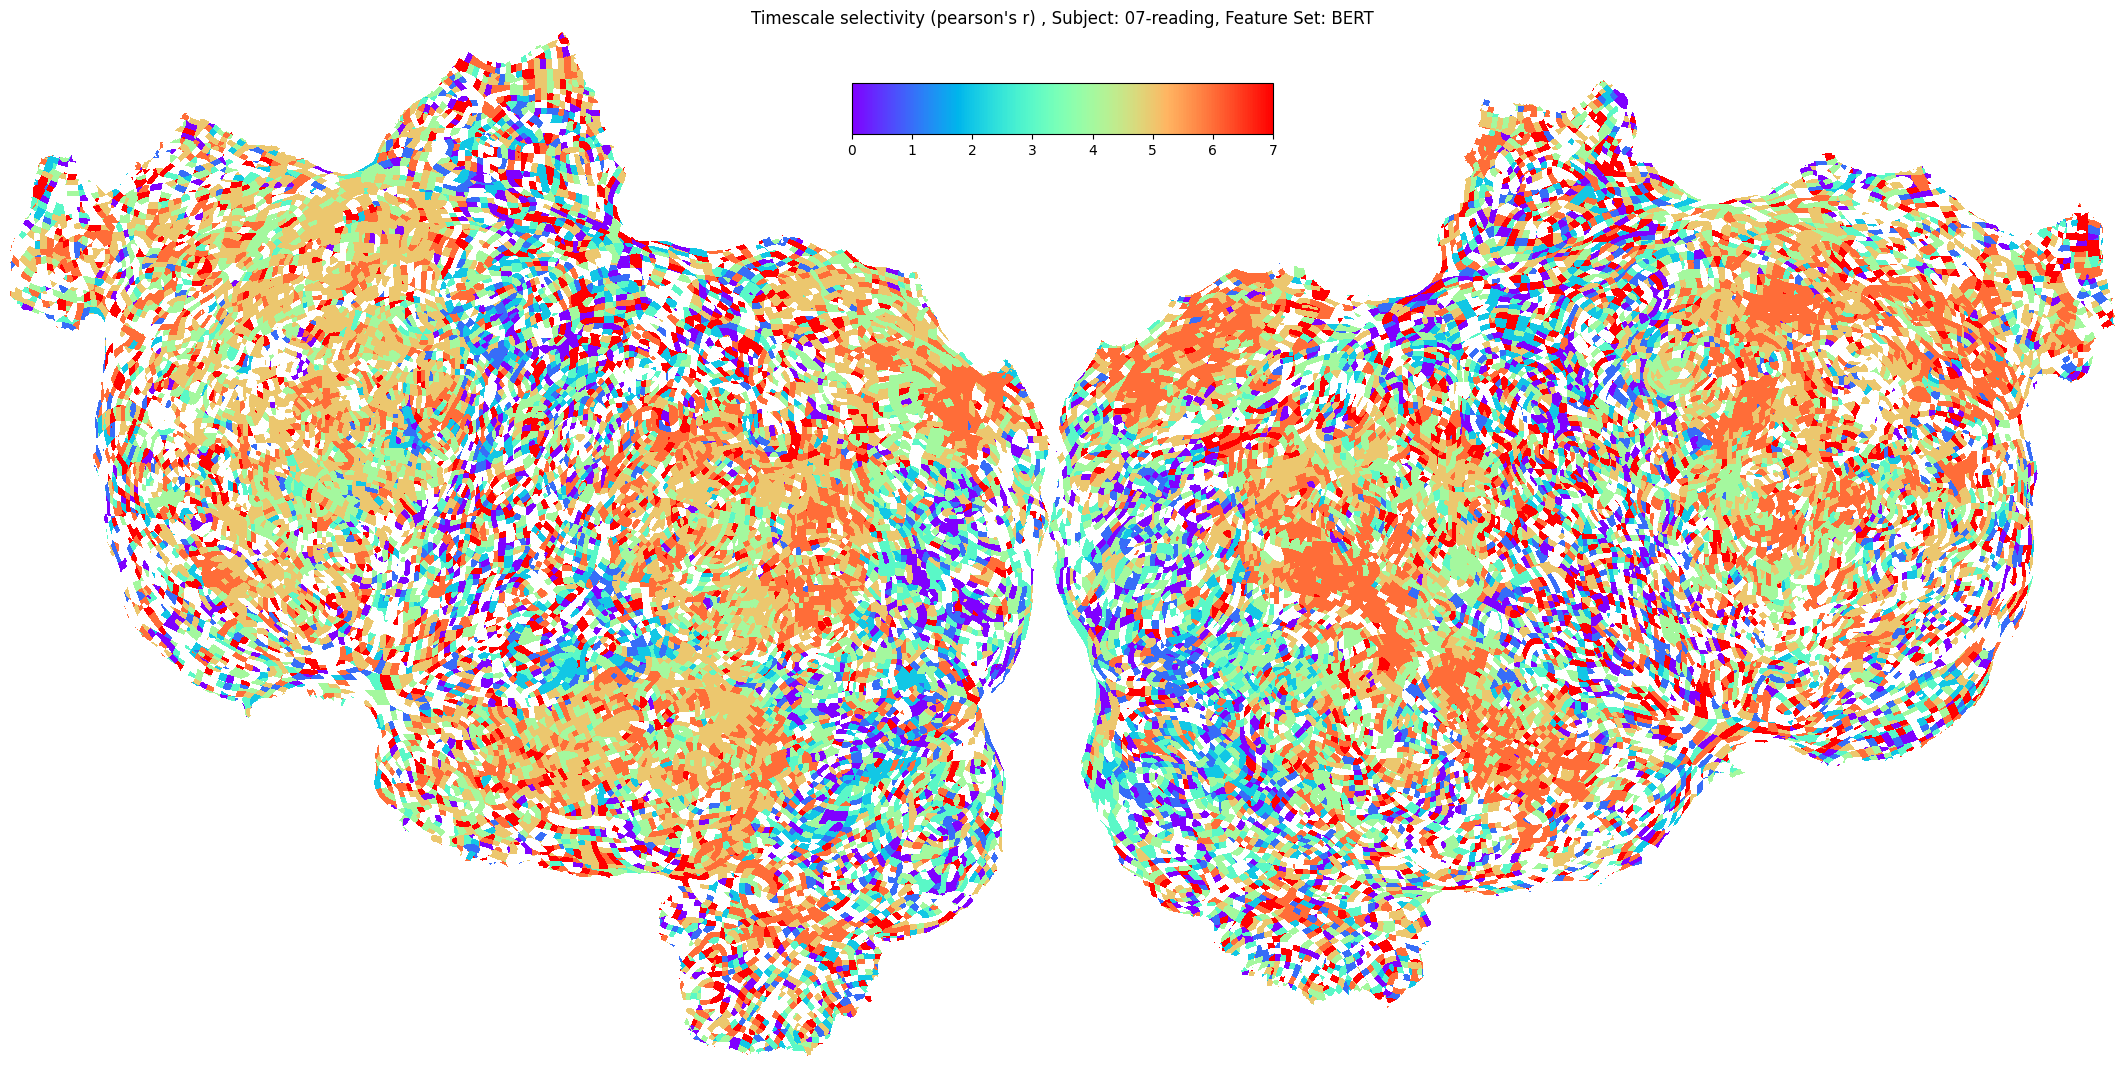

In [31]:
plot_timeline_flatmaps(result_config_json_bert["result_meta_file"], feature_name="BERT")

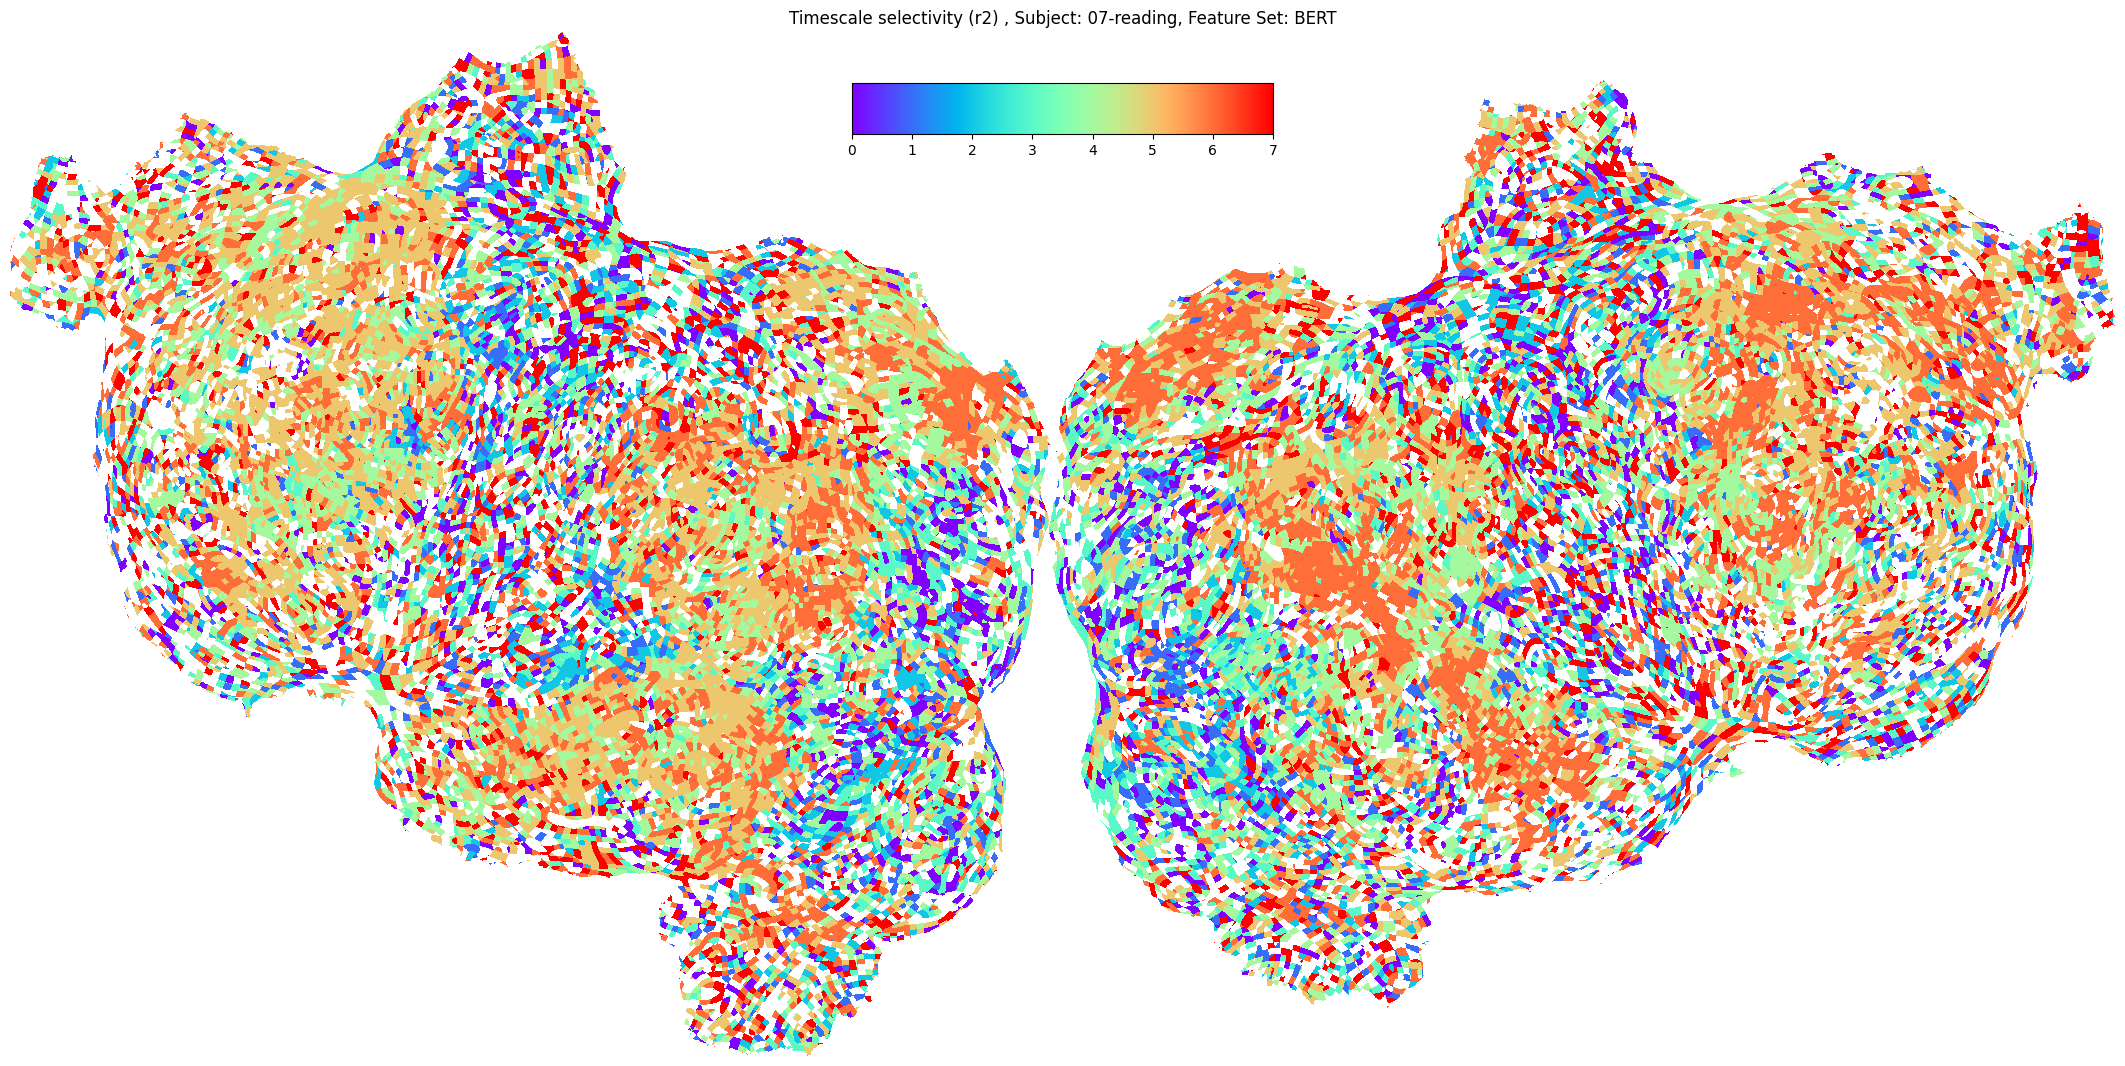

In [32]:
plot_timeline_flatmaps(
    result_config_json_bert["result_meta_file"], feature_name="BERT", is_corr=False
)

In [ ]:
def plot_flatmap(
    train_config_paths: List[str],
    feature_config_paths: List[str],
    subject_config_paths: List[str],
    feature_index: int = 0,
    is_corr: bool = True,
    save_dir=".temp/plots/",
):
    configs = list(
        product(subject_config_paths, train_config_paths, feature_config_paths)
    )

    for subject_config_path, train_config_path, feature_config_path in configs:
        print(subject_config_path, train_config_path, feature_config_path)
        with open(subject_config_path, "r") as f:
            subject_config = SubjectConfig(**json.load(f))
        with open(train_config_path, "r") as f:
            train_config = TrainerConfig(**json.load(f))
        with open(feature_config_path, "r") as f:
            feature_config = FeatureConfig(**json.load(f))
        trainer = Trainer(subject_config, feature_config)
        trainer.plot(
            trainer_config=train_config,
            feature_index=feature_index,
            is_corr=is_corr,
        )

        if os.path.exists(save_dir) == False:
            os.makedirs(save_dir)

        save_path = os.path.join(
            save_dir,
            f"{subject_config.sub_id}_{subject_config.task}_{feature_config.timescale}.png",
        )

        # plt.title(
        #     f"{subject_config.sub_id}_{subject_config.task}_{feature_config.timescale}"
        # )
        plt.savefig(save_path)

# mBERT MOTEN

In [ ]:
# BERT
train_config_paths = [
    # ".temp/config/train/bert_trainer_config.json",
    ".temp/config/train/mbert_trainer_config_100.json"
]

feature_config_paths = os.listdir(".temp/config/feature/mbert")
feature_config_paths = [
    os.path.join(".temp/config/feature/mbert", path) for path in feature_config_paths
]

subject_config_paths = [
    ".temp/config/subject/subject-07-reading.json",
]

plot_flatmap(
    train_config_paths=train_config_paths,
    feature_config_paths=feature_config_paths,
    subject_config_paths=subject_config_paths,
    feature_index=-1,
    is_corr=True,
    save_dir=".temp/results/mbert/plots/",
)

# mBERT - timescale

In [ ]:
plot_flatmap(
    train_config_paths=train_config_paths,
    feature_config_paths=feature_config_paths,
    subject_config_paths=subject_config_paths,
    feature_index=0,
    is_corr=True,
    save_dir=".temp/results/mbert/plots/",
)

# BERT MOTEN

In [ ]:
# BERT
train_config_paths = [
    ".temp/config/train/bert_trainer_config.json",
]

feature_config_paths = os.listdir(".temp/config/feature/bert")
feature_config_paths = [
    os.path.join(".temp/config/feature/bert", path) for path in feature_config_paths
]

subject_config_paths = [
    ".temp/config/subject/subject-07-reading.json",
]

plot_flatmap(
    train_config_paths=train_config_paths,
    feature_config_paths=feature_config_paths,
    subject_config_paths=subject_config_paths,
    feature_index=-1,
    is_corr=True,
    save_dir=".temp/results/bert/plots/",
)

# BERT - timescale

In [ ]:
plot_flatmap(
    train_config_paths=train_config_paths,
    feature_config_paths=feature_config_paths,
    subject_config_paths=subject_config_paths,
    feature_index=0,
    is_corr=True,
    save_dir=".temp/results/bert/plots/",
)